# WIP

## Table of Contents

### 1. [Introduction](#introduction)
### 2. [Data Handling](#datahandling)
### 3. [Data insight and visualization](#datainsight)
### 4. [Basic statistics](#basic-statistics)

## 1. Introduction <a class="anchor" id="introduction"></a>

The idea of this project is that we want to try and predict the stock price of Telenor ASA. We are going to try to make a model that takes in several variables and uses them to make a prediction as precise as possible. Of the variables we incorporate in our model at the start of this project, we will analyze which of them make the model better and eliminate the rest.
We acknowledge that making precise predictions about Telenor’s stock price is rather far fetched, seeing that if it were this easy people all over the world would do the same,


## 2. Data Handling <a class="anchor" id="datahandling"></a>

### a. Finding appropriate dataset

Our dependent variable must obviously be Telenor ASA's stock prices over a sertian amount of time, seeing that this is what we want to be able to predict. From "Yahoo! Finance" we found Telenor's monthly stock price in Norwegian kroner as of 01.31.2010 too 09.31.2022. In the Dataframe that we make later in this task we have call the Telenor's monthly stockprice series for "TEL". 

To predict the stock price as best as we possibly can, we want to gather data on different variables that we belive will have a significant effect on the stock price. If the variables have a significant effect, they will help us predict the price. We have gathered a variaty of different data/ variables that expand over the same timespand as our dependent variable "TEL". These independent variables are: 

        1. SP500 (which is a market-capitalization-weighted index of the 500 leading publicly traded companies in the U.S.)
        2. VIX (Is a measure of the market's expectation of volatility)
        3. BRENT_SPOT (Is the monthly pricing of crude oil)
        4. DNB ("Den Norske Bank's" monthly stock price)
        5. FDX (Fedex monthly stock price)
        6. EQNR (Equinor's monthly stock price)
        7. MOWI (Norway's biggest exporter of seafood)
        8. Monthly_KPI (The Norwegian monthly consumer price index)
        9. Policy_rate (The Norwegian monthly policy rate)
        10. TEL_PCT_Change (The monthly change in Telenor's stock price, in percent)
        11. TEL_IS_POS (Wether the monthly change in Telenor's stock price is positive or negative)

S&P 500 is often used as standard measuring tool for market growth. Therefore we believe it is a good indicator for general economic growth and a variable that will have correlation too our dependent variable.
We belive the independent variable "VIX" is relevant because it tells us something about how the investors feel about the market at a sertain moment in time. If the investors belive that the market is stabile and safe that will incourage more investments in the stock market, and thus a higher stockprice. If the investors expect a volatile market they will be more reluctant to invest in the market.
The reason behind why we have included the variables "BRENT_SPOT" and "MOWI" is that Telenor ASA is on the Norwegian stock exchange which is heavily influensed by oil and salmon prices. 
DNB and Equinor are both big Norwegian companies that, just like Telenor, are partly owned by the Norwegian gorvernment. They also are all on the Norwegian stock exchange. We therfore think that their stock prices will have some correlation and make our prediction model better.
The Fedex stock we believe is relevant because...
We have also included the Norwegian policy rate. That's because increase in the policy rate will make investors less likely to invest and vise versa. This makes the policy rate important as to wether more or less people will be investing in the stock market.
We have included the monthly consumer price index because we want to see if increases or decreases in the index will have an effect on Telenor's stock price. Will more people buy Telenor services when the index increases which then betters the stockprice? 



We have used different sources to gather our chosen variables. We used "Yahoo! Finance" to get the following variables; SP500, VIX, BRENT_SPOT, DNB, FDX, TEL, EQNR and MOWI. For "Monthly_KPI" we found our data on the website of the National Statistical Institute of Norway. The data on Policy rate we retrived from the Sentral Bank of Norway's website. 

Yahoo! Finance is a well known, highly regarded media insitute that provides financial news and data on large amount of businesses from all around the world. Seeing as Yahoo is a rather big mediahouse we belive that the data they provide is both accurate and trustworthy. Our two other sources, the National statistical Institute of Norway and the Sentral Bank of Norway, are well establishe governmental institutions. We have no reasons not to trust the data we have retrived from their webpages. 



* Hvorfor har vi valgt den dataen vi har valgt
* Hvor har vi fått dataen vår fra?
* Hva gjør at vi har valgt de forskjellige dataene

### b. Creating our dataset

In [8]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
#from keras.models import Sequential
#from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import numpy as np
import pandasdmx as sdmx
from pyjstat import pyjstat
import requests

C:\Users\Jørgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandasdmx\remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


In [9]:
stocks = ['^GSPC', "^VIX" , 'BZ=F', 'DNB.OL',"FDX", 'TEL.OL', 'EQNR.OL', "MOWI.OL"]
f = web.DataReader(stocks, 'yahoo',start='2010-01-01',end='2022-09-30')
df = f[[("Close", s) for s in stocks]]
df.columns = df.columns.droplevel(level=0)
df.reset_index(inplace=True)

In [10]:
df.tail()

Symbols,Date,^GSPC,^VIX,BZ=F,DNB.OL,FDX,TEL.OL,EQNR.OL,MOWI.OL
3285,2022-09-26,3655.040039,32.259998,84.059998,176.000000,142.899994,103.449997,344.450012,173.449997
3286,2022-09-27,3647.290039,32.599998,86.269997,177.000000,144.949997,106.550003,352.799988,170.050003
3287,2022-09-28,3719.040039,30.180000,89.320000,174.449997,149.990005,104.400002,353.799988,137.899994
3288,2022-09-29,3640.469971,31.840000,88.489998,169.300003,152.309998,101.500000,348.950012,133.550003
3289,2022-09-30,3585.620117,31.620001,87.959999,172.850006,148.470001,99.660004,358.100006,138.500000


In [11]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
stocksmonthly = df.resample('1M').mean()

In [12]:
stocksmonthly.rename(columns={"DNB.OL" : "DNB"}, inplace=True)
stocksmonthly.rename(columns={"MOWI.OL" : "MOWI"}, inplace=True)
stocksmonthly.rename(columns={"TEL.OL" : "TEL"}, inplace=True)
stocksmonthly.rename(columns={"EQNR.OL" : "EQNR"}, inplace=True)
stocksmonthly.rename(columns={"^GSPC" : "SP500"}, inplace=True)
stocksmonthly.rename(columns={"^VIX" : "VIX"}, inplace=True)
stocksmonthly.rename(columns={"BZ=F" : "BRENT_SPOT"}, inplace=True)

In [13]:
stocksmonthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2010-01-31 to 2022-09-30
Freq: M
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       153 non-null    float64
 1   VIX         153 non-null    float64
 2   BRENT_SPOT  153 non-null    float64
 3   DNB         152 non-null    float64
 4   FDX         153 non-null    float64
 5   TEL         153 non-null    float64
 6   EQNR        153 non-null    float64
 7   MOWI        153 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


We notice in the infochart that our DNB variable is incomplete and we will address this by filling it with the mean of the month prior and the month after, ensuring a not to unrealsitic estimate.

In [14]:
stocksmonthly["DNB"] = (stocksmonthly["DNB"].ffill()+stocksmonthly["DNB"].bfill())/2

In [15]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [16]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2010M01",
          "2010M02",
          "2010M03",
          "2010M04",
          "2010M05",
          "2010M06",
          "2010M07",
          "2010M08",
          "2010M09",
          "2010M10",
          "2010M11",
          "2010M12",
          "2011M01",
          "2011M02",
          "2011M03",
          "2011M04",
          "2011M05",
          "2011M06",
          "2011M07",
          "2011M08",
          "2011M09",
          "2011M10",
          "2011M11",
          "2011M12",
          "2012M01",
          "2012M02",
          "2012M03",
          "2012M04",
          "2012M05",
          "2012M06",
          "2012M07",
          "2012M08",
          "2012M09",
          "2012M10",
          "2012M11",
          "2012M12",
          "2013M01",
          "2013M02",
          "2013M03",
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [17]:
result = requests.post(POST_URL, json = payload)

In [18]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

In [19]:
stocksmonthly["Monthly_KPI"] = KPI_JA["value"].values

In [20]:
rate = pd.read_csv("https://data.norges-bank.no/api/data/IR/M.KPRA.SD.R?apisrc=qb&format=csv&startPeriod=2010-01-01&endPeriod=2022-09-01&locale=no&bom=include", sep=";", decimal=",")

In [21]:
rate.head()

,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
0,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-01,1.75,NaN,NaN
1,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-02,1.75,NaN,NaN
2,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-03,1.75,NaN,NaN
3,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-04,1.75,NaN,NaN
4,M,Månedlig,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,A,Gjennomsnitt av observasjoner gjennom perioden,2010-05,1.96,NaN,NaN


In [22]:
stocksmonthly["Policy_Rate"] = rate["OBS_VALUE"].values

In [23]:
#stocksmonthly["Monthly_KPI_Change_PCT"] = stocksmonthly.Monthly_KPI.pct_change()*100

In [24]:
stocksmonthly["TEL_PCT_Change"] = stocksmonthly["TEL"].pct_change()*100

In [25]:
stocksmonthly["TEL_IS_POS"] = np.where(stocksmonthly.TEL_PCT_Change>0, 1, 0)

In [26]:
stocksmonthly.head()

Symbols,SP500,VIX,BRENT_SPOT,DNB,FDX,TEL,EQNR,MOWI,Monthly_KPI,Policy_Rate,TEL_PCT_Change,TEL_IS_POS
Date,,,,,,,,,,,,
2010-01-31,1123.581582,20.643158,77.008421,66.472499,83.260000,79.355000,142.719999,46.971000,91.1,1.75,NaN,0
2010-02-28,1089.159989,22.540000,74.909999,64.467500,80.504211,75.627500,132.040000,52.585000,92.4,1.75,-4.697247,0
2010-03-31,1152.048690,17.767391,79.931304,67.847826,88.973478,79.454348,136.443479,51.529565,92.8,1.75,5.060128,1
2010-04-30,1197.316185,17.424286,85.753810,68.315789,91.950001,84.192105,144.047369,54.081579,93.0,1.75,5.962867,1
2010-05-31,1125.062006,31.929500,76.664737,65.055555,85.434000,80.877778,134.416667,54.419445,92.5,1.96,-3.936624,0


In [27]:
stocksmonthly.to_csv("stocksmonthly_csv.csv")

## 3. Data insight and visualization <a class="anchor" id="datainsight"></a>

### Graph

### Scatterplot

### Histogram

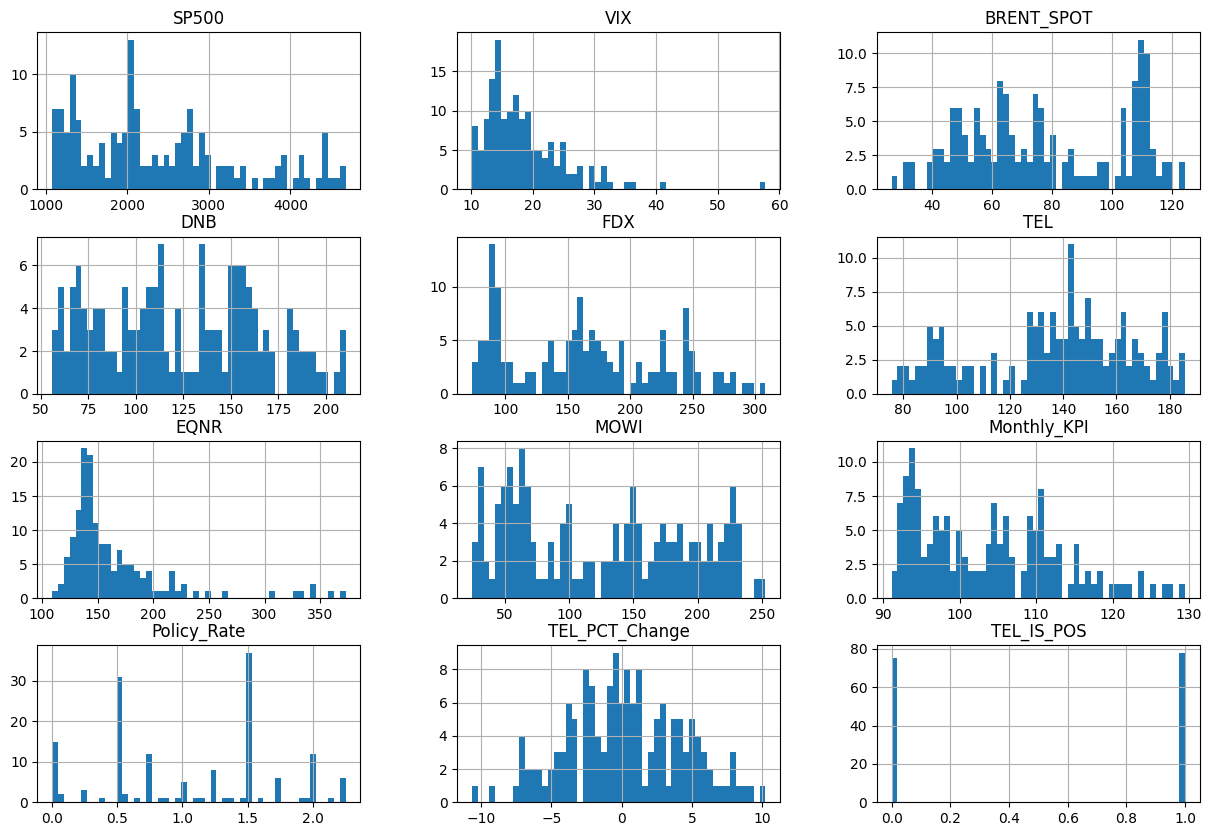

In [28]:
stocksmonthly.hist(bins=50, figsize=(15,10))
plt.show()

We se that the TEL_IS_POS vaiable is a binary vaiable. It shows us that there has been more months with growth than without growth. The stock variables FDX, EQNR, TEL, MOWI all range within simular variable ranges mostly between 50-250. We see that there are no normal distributions among the stocks. The VIX indexs aswell as the EQNR stock have a long tailed distribution witch indicates that there might be outliars. TEL_PCT_Change is the procentage change in price for the TEL stock. It is closer to normaly distributed centered around 0. This makes sense seeing as the TEL_IS_POS shows us that the number of times it goes negative is almost as big as the number its positive.

### Joint distribution

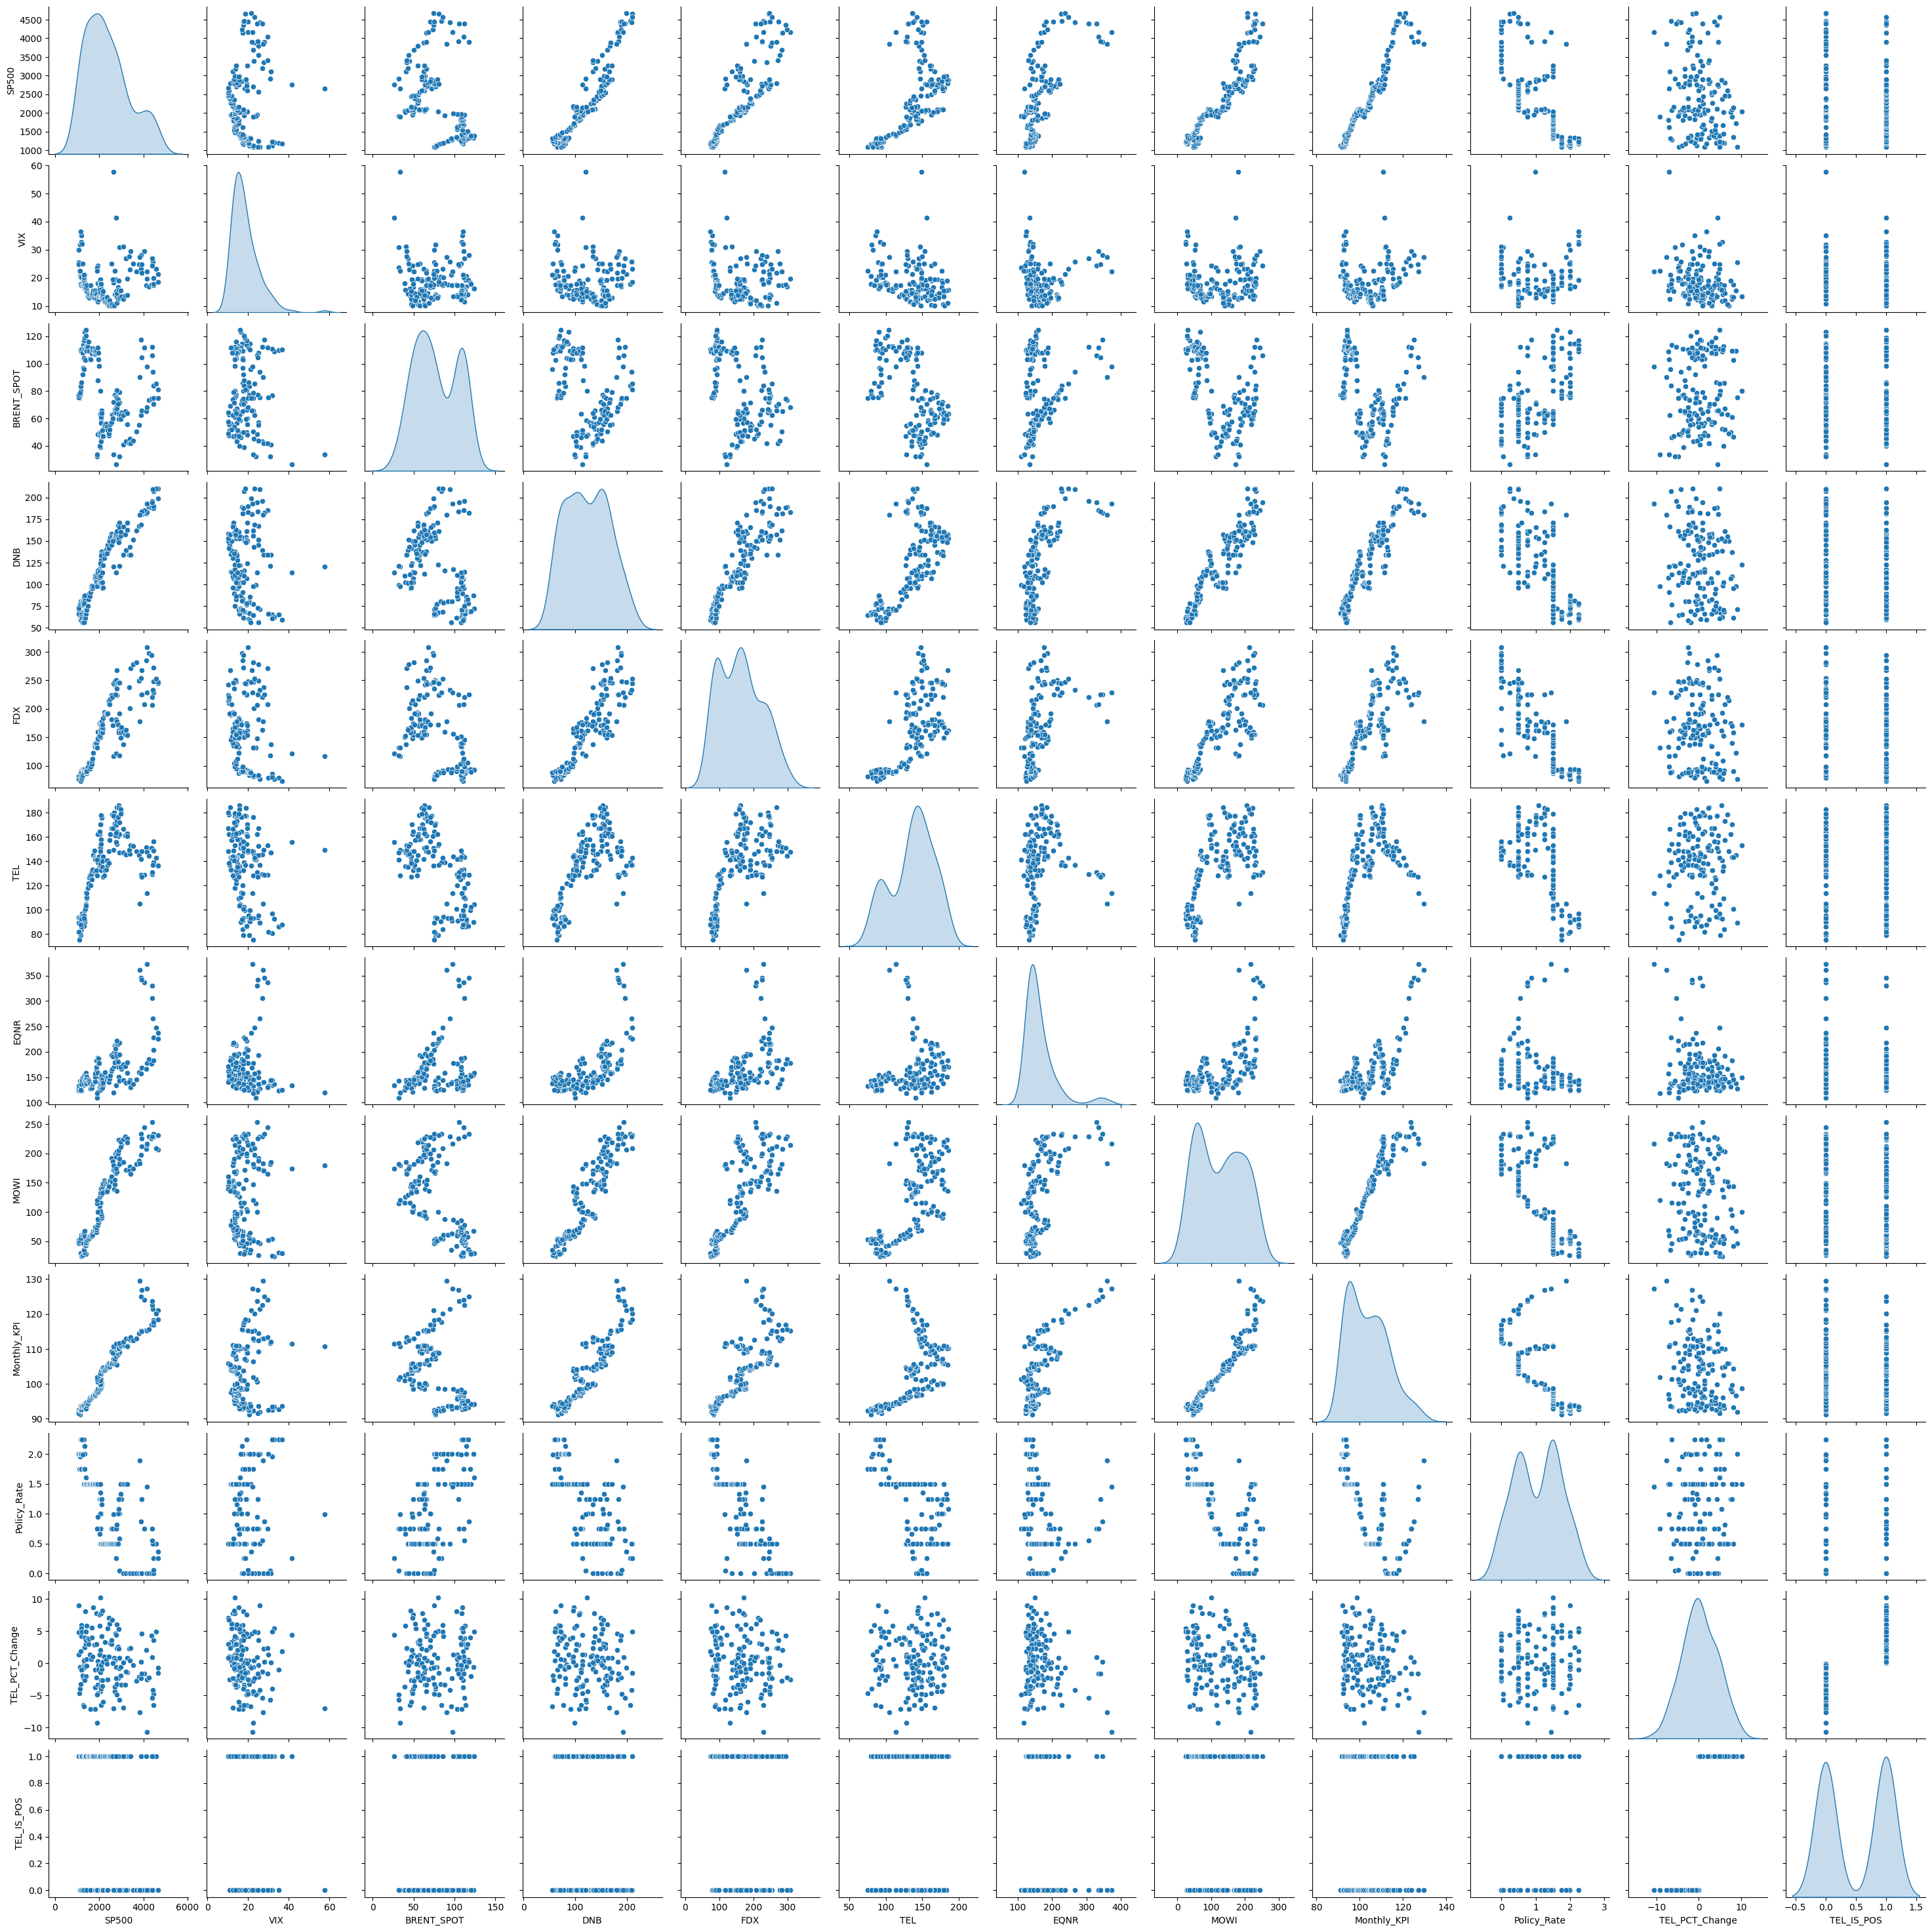

In [29]:
sns.pairplot(stocksmonthly, diag_kind='kde')
plt.show()

### Boxplots

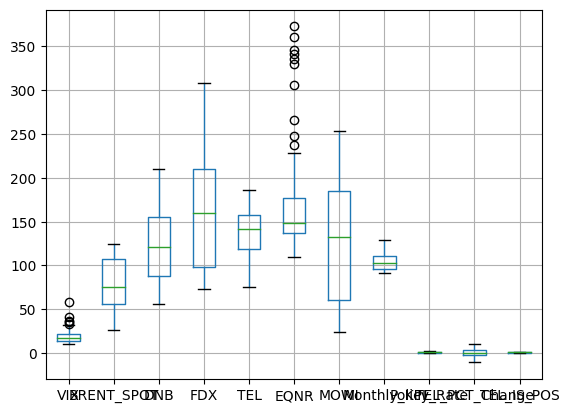

In [30]:
stocksmonthly.drop(["SP500"], axis=1).boxplot()
plt.show()

## 4. Basic statistics <a class="anchor" id="basic-statistics"></a>

### Mean and median

In [31]:
stocksmonthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
SP500,153.0,2371.991998,978.266489,1079.803336,1550.828986,2099.283658,2897.450451,4674.772772
VIX,153.0,18.569924,6.725341,10.125455,13.974546,17.271500,21.354546,57.736818
BRENT_SPOT,153.0,77.717657,25.975428,26.537143,55.926843,74.807727,107.199500,124.544546
DNB,153.0,123.743118,41.561353,55.969048,87.497222,120.800000,155.723809,210.277274
FDX,153.0,162.975446,61.564268,73.024286,98.257727,159.393478,209.647726,308.411497
TEL,153.0,136.450683,28.809100,75.627500,118.245455,141.800001,157.854547,185.800001
EQNR,153.0,164.720067,48.155173,109.150000,136.871428,147.882609,176.690910,372.776090
MOWI,153.0,126.447722,67.033172,24.095238,60.861363,132.726318,184.640001,252.866670
Monthly_KPI,153.0,103.745752,9.230620,91.100000,95.400000,103.100000,110.400000,129.500000


### Minimum and maximum values

### Standard deviation and average deviation

### Quantiles and percentiles

### Correlation

## 5. Data preparation for machine learning

## 6. Model training and analysis

## 7. Discussion and implementation

## 8. Conclusion

## 9. References

SSB \
Norges Bank \
Yahoo

## 10. Word Count

In [32]:
import json

with open('Arbeidskrav.ipynb') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print("We have", wordCount, "words excluding coding blocks.")

We have 896 words excluding coding blocks.
